In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 200)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np 
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

data from : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales?resource=download

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
df.replace(' ',np.nan, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [5]:
df.columns = df.columns.str.replace(' ','_')

In [6]:
df.YEAR_BUILT.min()

0

In [7]:
df = df.replace({'BOROUGH' : { 1 : 'Manhattan', 2 : 'Bronx', 3 : 'Brooklyn ', 4 : 'Queens', 5 : 'Staten Island'},
                 'LAND_SQUARE_FEET' : { ' -  ' : 0},
                   'GROSS_SQUARE_FEET' : { ' -  ' : 0},
                    'SALE_PRICE' : { ' -  ' : 0}})
df

,Unnamed:_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,NaN,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,NaN,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,NaN,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,NaN,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [8]:
df.isna().sum()

Unnamed:_0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING_CLASS_CATEGORY               0
TAX_CLASS_AT_PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING_CLASS_AT_PRESENT           738
ADDRESS                               0
APARTMENT_NUMBER                  65496
ZIP_CODE                              0
RESIDENTIAL_UNITS                     0
COMMERCIAL_UNITS                      0
TOTAL_UNITS                           0
LAND_SQUARE_FEET                      0
GROSS_SQUARE_FEET                     0
YEAR_BUILT                            0
TAX_CLASS_AT_TIME_OF_SALE             0
BUILDING_CLASS_AT_TIME_OF_SALE        0
SALE_PRICE                            0
SALE_DATE                             0
dtype: int64

In [8]:
df[['BLOCK','LOT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','TOTAL_UNITS','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','YEAR_BUILT','SALE_PRICE']] = df[['BLOCK','LOT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','TOTAL_UNITS','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','YEAR_BUILT','SALE_PRICE']].astype('int64')
df[['BOROUGH']] = df[['BOROUGH']].astype('category')

In [9]:
df = df[['BOROUGH','TOTAL_UNITS','YEAR_BUILT','SALE_PRICE','SALE_DATE']]
df

,BOROUGH,TOTAL_UNITS,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,Manhattan,5,1900,6625000,2017-07-19 00:00:00
1,Manhattan,31,1900,0,2016-12-14 00:00:00
2,Manhattan,17,1900,0,2016-12-09 00:00:00
3,Manhattan,10,1913,3936272,2016-09-23 00:00:00
4,Manhattan,6,1900,8000000,2016-11-17 00:00:00
...,...,...,...,...,...
84543,Staten Island,2,1998,450000,2016-11-28 00:00:00
84544,Staten Island,2,1998,550000,2017-04-21 00:00:00
84545,Staten Island,2,1925,460000,2017-07-05 00:00:00
84546,Staten Island,7,2001,11693337,2016-12-21 00:00:00


In [12]:
df = df[df['YEAR_BUILT'] > 0]
df = df[df['SALE_PRICE'] > 100000] # harga jual yang diambil hanya yang diatas 100.000
df

,BOROUGH,TOTAL_UNITS,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,Manhattan,5,1900,6625000,2017-07-19 00:00:00
3,Manhattan,10,1913,3936272,2016-09-23 00:00:00
4,Manhattan,6,1900,8000000,2016-11-17 00:00:00
6,Manhattan,8,1920,3192840,2016-09-23 00:00:00
9,Manhattan,24,1920,16232000,2016-11-07 00:00:00
...,...,...,...,...,...
84541,Staten Island,2,1994,648000,2016-12-07 00:00:00
84543,Staten Island,2,1998,450000,2016-11-28 00:00:00
84544,Staten Island,2,1998,550000,2017-04-21 00:00:00
84545,Staten Island,2,1925,460000,2017-07-05 00:00:00


In [13]:
df.describe()

,TOTAL_UNITS,YEAR_BUILT,SALE_PRICE
count,53099.000000,53099.000000,5.309900e+04
mean,1.968982,1950.820769,1.535749e+06
std,18.090549,34.353421,1.284486e+07
min,0.000000,1111.000000,1.003350e+05
25%,0.000000,1925.000000,4.000000e+05
50%,1.000000,1949.000000,6.450000e+05
75%,2.000000,1970.000000,1.085000e+06
max,2261.000000,2017.000000,2.210000e+09


In [14]:
df.isna().sum()

BOROUGH        0
TOTAL_UNITS    0
YEAR_BUILT     0
SALE_PRICE     0
SALE_DATE      0
dtype: int64

# Ukuran Pemusatan Data (*Masure Of Central Tendency*) 

In [15]:
# Mean (rata-rata)
df.mean()

TOTAL_UNITS    1.968982e+00
YEAR_BUILT     1.950821e+03
SALE_PRICE     1.535749e+06
dtype: float64

In [16]:
# Median (nilai tengah)
df.median()

TOTAL_UNITS         1.0
YEAR_BUILT       1949.0
SALE_PRICE     645000.0
dtype: float64

In [17]:
# Modus (nilai yang sering muncul)
df.mode()

,BOROUGH,TOTAL_UNITS,YEAR_BUILT,SALE_PRICE,SALE_DATE
0,Queens,1,1920,450000,2017-06-29 00:00:00


# Ukuran Pesebaran Data (*Masure Of Variance*)

In [18]:
# Range (Maximum Value - Minimum Value)
Range = df['SALE_PRICE'].max() -  df['SALE_PRICE'].min()
Range

2209899665

In [19]:
# Variance 
np.var(df['SALE_PRICE'])

164987204108299.8

In [20]:
np.std(df['SALE_PRICE'])

12844734.489599222

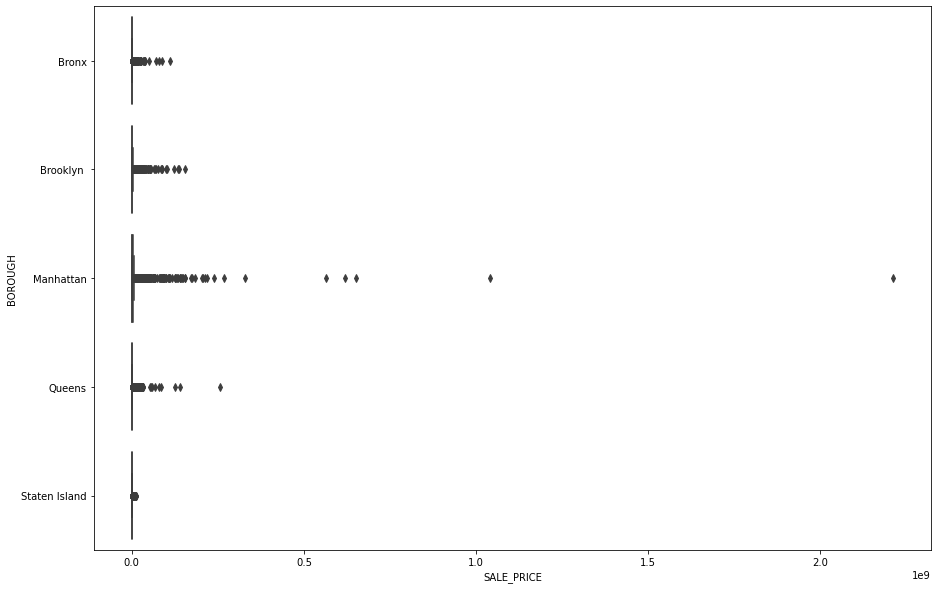

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="SALE_PRICE", y="BOROUGH");

Dari distribusi boxplot diatas maka dapat dilihat bahwa banyak sekali outlier SALE_PRICE di Kota Manhattan, artinya nilai atau harga rumah pada kota tersebut cinderung yang tertinggi ketimbang empat lainnya, dan berdistribusi diantara 1sampai 5 milyar(e9).

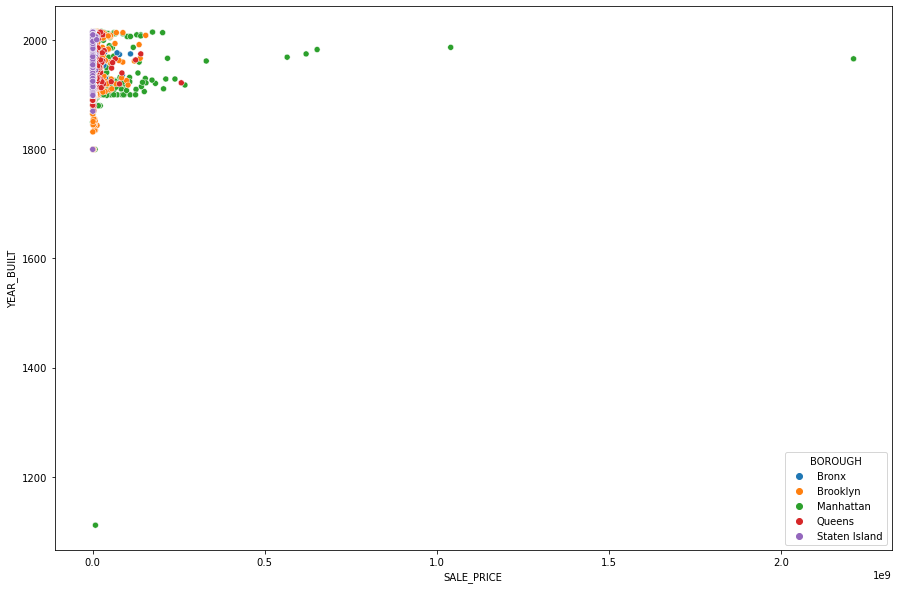

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="SALE_PRICE", y="YEAR_BUILT", hue="BOROUGH");

Dari scatter plot diatas dapat terlihat bahwa tahun pembangunan properti berdistribusi di tahun 1800 sampai > 2000, di tahun itu properti di kota Staten Island cinderung Statis dan sama saja harga jualnya, namun berbeda dengan Manhattan yang lebih tininggi dan bervariasi.

In [39]:
df.isna().sum()

BOROUGH        0
TOTAL_UNITS    0
YEAR_BUILT     0
SALE_PRICE     0
SALE_DATE      0
dtype: int64

Uji yang akan dilakukan adalah uji perbedaan rata-rata 2 populasi, dengan variansi tidak sama, dan menggunakan uji satu arah. Data yang akan kita uji adalah data harga jual dan total unit properti pada kota Queens dan Manhattan. Hipotesis untuk uji perbedaan rata-rata 2 populasi adalah sebagai berikut.

In [48]:
# Two Sample t-Test

from scipy.stats import ttest_ind as tind

# Separating two samples into different data frames
df1 = df[df['BOROUGH'] == "Queens"]
df2 = df[df['BOROUGH'] == "Manhattan"]
         
# Comparing petal length of the two species
stats.ttest_ind(df1.dropna()['SALE_PRICE'], df2.dropna()['SALE_PRICE'])

# [DIY] Compare petal width of the two species
stats.ttest_ind(df1.dropna()['TOTAL_UNITS'], df2.dropna()['TOTAL_UNITS'])

Ttest_indResult(statistic=-0.816455939527025, pvalue=0.4142459959883278)

Berdasarkan uji perbandingan rata-rata 2 populasi dengan variansi tidak sama (satu arah), diperoleh p-value = 0.4142459959883278 < α. Dengan menggunakan tingkat kepercayaan 95%, data yang ada mendukung bahwa harga jual dan total unit properti pada kota Queens dan Manhattan.